In [10]:
import cv2
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

In [ ]:
#이미지분석을 학습모델
resnet50=tf.keras.applications.resnet.ResNet50(
    weights='imagenet', input_shape=(224, 224, 3)
)

In [12]:
#분류할 이미지 사이즈와 형태 변경
file = '../data/dog.png'
image = np.array(Image.open(file))
image_resize = cv2.resize(image, (224,224))
image_reshape = image_resize.reshape([1, 224, 224, 3])

In [13]:
#이미지분류 예측
pred=resnet50.predict(image_reshape)

1/1 [==============================] - 1s 599ms/step


In [14]:
decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred)

In [15]:
for idx, pred in enumerate(decoded_pred[0]):
    print(f'{idx+1}위: {pred[1]}({pred[2]*100:.2f}%)')

1위: Siberian_husky(37.08%)
2위: Eskimo_dog(23.64%)
3위: white_wolf(17.68%)
4위: Cardigan(12.10%)
5위: Samoyed(2.56%)


In [16]:
def predict(file):
    image = np.array(Image.open(file))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    resnet50=tf.keras.applications.resnet.ResNet50(
        weights='imagenet', input_shape=(224, 224, 3)
    )

    image_resize = cv2.resize(image, (224,224))
    image_reshape = image_resize.reshape([1, 224, 224, 3])

    pred=resnet50.predict(image_reshape)
    decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred)
    for idx, pred in enumerate(decoded_pred[0]):
        print(f'{idx+1}위: {pred[1]}({pred[2]*100:.2f}%)')
    

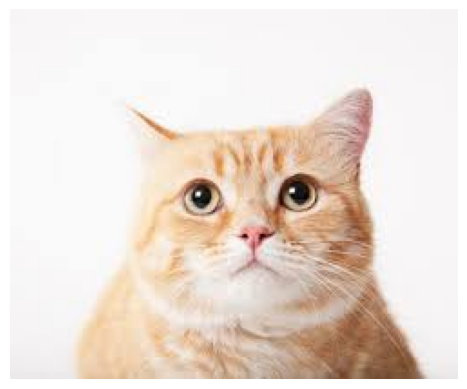

1/1 [==============================] - 1s 539ms/step
1위: Persian_cat(59.24%)
2위: tabby(13.37%)
3위: tiger_cat(7.78%)
4위: Egyptian_cat(1.52%)
5위: lynx(1.21%)


In [17]:
predict('../data/cat.png')